# Set up

In [1]:
# update path with data dir
import sys
sys.path.append('../data/')

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting data

In [4]:
with open('../csvs/top_50_weekly_data.json') as f: 
    d = json.loads(f.read())

In [5]:
len(d)

1900

In [17]:
d[0]

{'active_chip': '',
 'automatic_subs': [{'id': 57532,
   'element_in': 435,
   'element_out': 271,
   'entry': 107827,
   'event': 1}],
 'entry_history': {'id': 107827,
  'movement': 'new',
  'points': 75,
  'total_points': 75,
  'rank': 405969,
  'rank_sort': 407825,
  'overall_rank': 405969,
  'targets': None,
  'event_transfers': 0,
  'event_transfers_cost': 0,
  'value': 1000,
  'points_on_bench': 14,
  'bank': 0,
  'entry': 107827,
  'event': 1},
 'event': {'id': 1,
  'name': 'Gameweek 1',
  'deadline_time': '2018-08-10T18:00:00Z',
  'average_entry_score': 53,
  'finished': True,
  'data_checked': True,
  'highest_scoring_entry': 890626,
  'deadline_time_epoch': 1533924000,
  'deadline_time_game_offset': 3600,
  'deadline_time_formatted': '10 Aug 19:00',
  'highest_score': 137,
  'is_previous': False,
  'is_current': False,
  'is_next': False},
 'picks': [{'element': 454,
   'position': 1,
   'is_captain': False,
   'is_vice_captain': False,
   'multiplier': 1,
   'entry': 107827,

In [6]:
player_value_df = pd.read_csv('../csvs/player_value.csv', index_col=0)

In [7]:
first_team_value_arr = []
bench_value_arr = []

for i in range(0, len(d)):
    try:
        event_entry_d = d[i]
        first_team = [j for j in event_entry_d['picks'] if j['position'] in range(1, 12)]
        bench = [j for j in event_entry_d['picks'] if j['position'] not in range(1, 12)]

        first_team_value = \
        [player_value_df[
            (player_value_df['element'] == k['element'])
            & (player_value_df['event'] == k['event'])]['value'].values[0]
         for k in first_team]

        bench_value = \
        [player_value_df[
            (player_value_df['element'] == k['element'])
            & (player_value_df['event'] == k['event'])]['value'].values[0]
         for k in bench]

        first_team_value_arr.append(sum(first_team_value))
        bench_value_arr.append(sum(bench_value))
    except:
        continue
    
    


In [8]:
np.mean(first_team_value_arr)/11

75.89825852596663

In [9]:
np.mean(bench_value_arr)/4

49.467645381984035

In [10]:
len(bench_value_arr)

1754

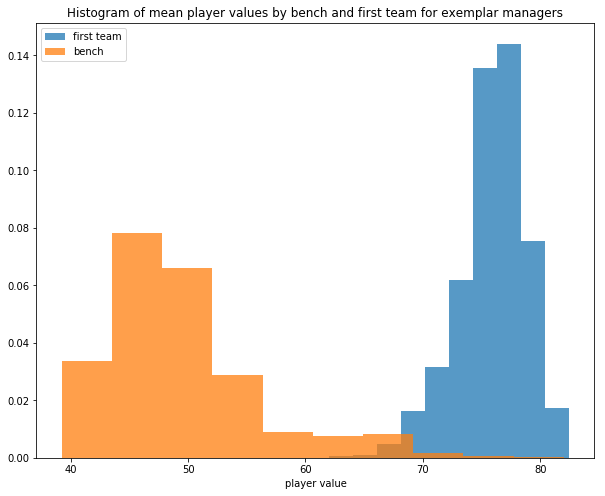

In [16]:
plt.figure(figsize=(10, 8))
plt.hist(pd.Series(first_team_value_arr)/11, alpha=0.75, label='first team', density=True, bins=10)
plt.hist(pd.Series(bench_value_arr)/4, alpha=0.75, label='bench', density=True, bins=10)
plt.legend()
plt.title('Histogram of mean player values by bench and first team for exemplar managers')
plt.xlabel('player value')
plt.show()